# Climate Analysis and Exploration


## * Import Dependencies

In [35]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd
import datetime as dt

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, Column, Integer, String,Float

In [38]:
# Start connection
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a session
session = Session(engine)
conn = engine.connect()

In [39]:
inspector = inspect(engine)

In [40]:
# List all tables
inspect(engine).get_table_names()

['measurement', 'station']

In [41]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [42]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Precipitation Analysis

In [43]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [44]:
Base.classes.keys()

['measurement', 'station']

In [45]:
# Assign the measurement class to a variable called `Measurement`
M = Base.classes.measurement
M

sqlalchemy.ext.automap.measurement

In [46]:
# Query table and get first row
first_row = session.query(M).first()

# Print row as a dictionary
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f66f08b4c0>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [47]:
M_data = session.query(M.date, M.prcp).all()
M_data

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [48]:
latest_date = session.query(M.date).order_by(M.date.desc()).first().date
latest_date

'2017-08-23'

In [49]:
data = session.query(M.date,M.prcp).filter(func.strftime("%m",M.date)).order_by(M.date.desc()).all()
len(data)

19550

In [50]:
# Date 12 months from the latest date
last_twelve_months = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_twelve_months

datetime.datetime(2016, 8, 23, 0, 0)

In [51]:
k = (
    session
    .query(M.date)
    .filter(func.strftime("%m",M.date))
    .filter(M.date>'2016-08-23')
    .order_by(M.date.desc())
    .all()
)
len(k)

2223

In [118]:
k = (
    session
    .query(M.date,M.prcp)
    .filter(func.strftime("%m",M.date))
    .filter(M.date>'2016-08-23')
    .filter()
    .order_by(M.date.desc())
    .all()
)


In [53]:
df = pd.DataFrame(k, columns=['M.date', 'M.prcp'])
df.set_index('M.date', inplace=True,)
df

,M.prcp
M.date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
...,...
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [54]:
trim_df = df.replace(0,np.nan).dropna(axis=1,how="all")
final_df = trim_df.dropna(how="all")
len(final_df)

1142

In [55]:
final_df.head()

,M.prcp
M.date,
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.50
2017-08-21,0.02
2017-08-21,0.56


In [104]:
my_dictionary = final_df.to_dict()
print(my_dictionary)

{'M.prcp': {'2017-08-23': 0.45, '2017-08-22': 0.5, '2017-08-21': 0.56, '2017-08-20': 0.01, '2017-08-19': 0.09, '2017-08-18': 0.06, '2017-08-17': 0.13, '2017-08-16': 0.42, '2017-08-15': 0.42, '2017-08-14': 0.22, '2017-08-12': 0.14, '2017-08-10': 0.07, '2017-08-09': 0.15, '2017-08-08': 0.34, '2017-08-07': 0.05, '2017-08-05': 0.06, '2017-08-04': 0.04, '2017-08-03': 0.06, '2017-08-02': 0.25, '2017-08-01': 0.12, '2017-07-30': 0.3, '2017-07-29': 0.3, '2017-07-28': 0.4, '2017-07-27': 0.01, '2017-07-26': 0.3, '2017-07-25': 0.3, '2017-07-24': 0.84, '2017-07-23': 0.8, '2017-07-22': 4.0, '2017-07-21': 0.1, '2017-07-20': 0.7, '2017-07-19': 0.27, '2017-07-18': 2.4, '2017-07-17': 0.39, '2017-07-16': 0.5, '2017-07-15': 0.1, '2017-07-14': 0.68, '2017-07-13': 0.68, '2017-07-12': 0.05, '2017-07-11': 0.02, '2017-07-10': 0.02, '2017-07-09': 0.11, '2017-07-08': 0.02, '2017-07-07': 0.3, '2017-07-06': 0.02, '2017-07-04': 0.08, '2017-07-03': 0.4, '2017-07-02': 0.5, '2017-07-01': 0.1, '2017-06-30': 0.2, '2017-

In [100]:
#save data to file location
final_df.to_csv('./Resources/precipitation_data.csv', index=False)

In [101]:
df_saved = pd.read_csv('precipitation_data.csv')
df_saved  

,M.date,M.prcp
0,2017-08-23,0.08
1,2017-08-23,0.45
2,2017-08-22,0.50
3,2017-08-21,0.02
4,2017-08-21,0.56
...,...,...
1219,2016-08-02,0.20
1220,2016-08-02,0.55
1221,2016-08-02,0.07
1222,2016-08-02,0.83


In [ ]:
#save data to file location
final_df.to_csv('./Resources/precipitation_data.csv', index=False)

In [80]:
df_saved.describe()


,M.prcp
count,1224.000000
mean,0.313848
std,0.569775
min,0.010000
25%,0.030000
50%,0.110000
75%,0.320000
max,6.700000


<Figure size 1440x576 with 0 Axes>

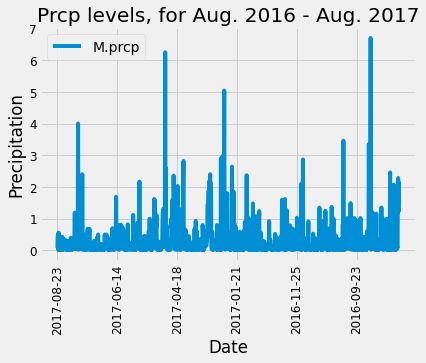

In [59]:
plt.figure(figsize=(20,8))
final_df.plot.line(title="Prcp levels, for Aug. 2016 - Aug. 2017", fontsize = 12, rot='90')
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.savefig("lineplot.png",bbox_inches='tight',pad_inches=1)
plt.show()

# Station Analysis

In [60]:
# Assign the station class to a variable called `Station`
S = Base.classes.station
S

sqlalchemy.ext.automap.station

In [75]:
# Query table and get first row
first_row = session.query(S).first()

# Print row as a dictionary
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f66e6d0e20>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0}

In [116]:
S_data = session.query(S.station, S.latitude, S.elevation, S.longitude, S.id, S.name).all()
S_data

[('USC00519397', 21.2716, 3.0, -157.8168, 1, 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 21.4234, 14.6, -157.8015, 2, 'KANEOHE 838.1, HI US'),
 ('USC00514830', 21.5213, 7.0, -157.8374, 3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 21.3934, 11.9, -157.9751, 4, 'PEARL CITY, HI US'),
 ('USC00518838', 21.4992, 306.6, -158.0111, 5, 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 21.33556, 19.5, -157.71139, 6, 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 21.45167, 32.9, -157.84888999999998, 7, 'WAIHEE 837.5, HI US'),
 ('USC00511918', 21.3152, 0.9, -157.9992, 8, 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 21.3331, 152.4, -157.8025, 9, 'MANOA LYON ARBO 785.2, HI US')]

In [106]:
S_data = session.query(S.station, S.latitude, S.elevation, S.longitude, S.id, S.name).all()
S_data

[('USC00519397', 21.2716, 3.0, -157.8168, 1, 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 21.4234, 14.6, -157.8015, 2, 'KANEOHE 838.1, HI US'),
 ('USC00514830', 21.5213, 7.0, -157.8374, 3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 21.3934, 11.9, -157.9751, 4, 'PEARL CITY, HI US'),
 ('USC00518838', 21.4992, 306.6, -158.0111, 5, 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 21.33556, 19.5, -157.71139, 6, 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 21.45167, 32.9, -157.84888999999998, 7, 'WAIHEE 837.5, HI US'),
 ('USC00511918', 21.3152, 0.9, -157.9992, 8, 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 21.3331, 152.4, -157.8025, 9, 'MANOA LYON ARBO 785.2, HI US')]

In [63]:
count_stations = session.query(S.station).count()
count_stations

9

In [64]:
for row in S_data:
    print(row)

('USC00519397', 21.2716, 3.0, -157.8168, 1, 'WAIKIKI 717.2, HI US')
('USC00513117', 21.4234, 14.6, -157.8015, 2, 'KANEOHE 838.1, HI US')
('USC00514830', 21.5213, 7.0, -157.8374, 3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
('USC00517948', 21.3934, 11.9, -157.9751, 4, 'PEARL CITY, HI US')
('USC00518838', 21.4992, 306.6, -158.0111, 5, 'UPPER WAHIAWA 874.3, HI US')
('USC00519523', 21.33556, 19.5, -157.71139, 6, 'WAIMANALO EXPERIMENTAL FARM, HI US')
('USC00519281', 21.45167, 32.9, -157.84888999999998, 7, 'WAIHEE 837.5, HI US')
('USC00511918', 21.3152, 0.9, -157.9992, 8, 'HONOLULU OBSERVATORY 702.2, HI US')
('USC00516128', 21.3331, 152.4, -157.8025, 9, 'MANOA LYON ARBO 785.2, HI US')


In [65]:
# cross join
ms_data = session.query(M.date, M.tobs, M.id, S.station).all()
len(ms_data)

C:\Users\User\anaconda38\lib\site-packages\sqlalchemy\sql\compiler.py:362: SAWarning: SELECT statement has a cartesian product between FROM element(s) "measurement" and FROM element "station".  Apply join condition(s) between each element to resolve.
  util.warn(message)


175950

In [66]:
most_active_station = session.query(M.station, func.count(M.station)).\
            group_by(M.station).\
            order_by(func.count(M.station).desc()).all()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
measure_tobs = most_active_station[0][0]

In [68]:
session.query(func.min(M.tobs), func.avg(M.tobs), func.max(M.tobs)).\
                filter(M.station == measure_tobs).all()

[(54.0, 71.66378066378067, 85.0)]

In [69]:
temp_observe = session.query(M.station, M.tobs).\
                filter(M.station == measure_tobs).\
                filter(M.date >'2016-08-23' ).all()
temp_observe

[('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [111]:
temp_observe_df = pd.DataFrame(temp_observe, columns=['M.station', 'M.tobs'])
temp_observe_df.set_index('M.station', inplace=True,)
temp_observe_df.head()

,M.tobs
M.station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


In [90]:
temp_observe_df.describe()

,M.tobs
count,351.000000
mean,73.096866
std,4.735491
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


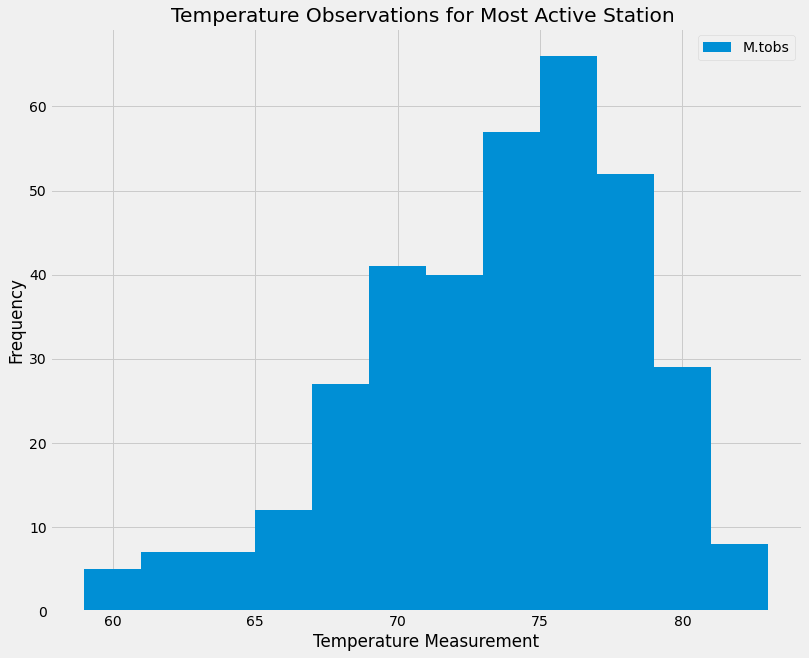

In [74]:
temp_observe_df.plot(kind="hist", by="M.tobs", bins=12, figsize=(12,10))
plt.title("Temperature Observations for Most Active Station ")
plt.xlabel("Temperature Measurement")
plt.show()

# Climate App

In [119]:
M = Base.classes.measurement
S = Base.classes.station

## Start

In [121]:
start = session.query(M.date).order_by(M.date).first()
start

('2010-01-01',)

In [131]:
# Finding minimum temp, maximum temp and average temp for temp measurement from start
#Minimum temp
mintemp = session.query(func.min(M.tobs)).filter(M.date>='2010-01-01' ).all()
mintemp

[(53.0,)]

In [132]:
maxtemp = session.query(func.max(M.tobs)).filter(M.date>='2010-01-01' ).all()
maxtemp

[(87.0,)]

In [133]:
avgtemp = session.query(func.avg(M.tobs)).filter(M.date>='2010-01-01').all()
avgtemp

[(73.09795396419437,)]

In [143]:
start_temp_dict = {'Minimum Temperature':53.0, 'Maximum Temperature':87.0, 'Average Temperature':73.10}
start_temp_dict

{'Minimum Temperature': 53.0,
 'Maximum Temperature': 87.0,
 'Average Temperature': 73.1}

In [144]:
end = session.query(M.date).order_by(M.date.desc()).first()
end

('2017-08-23',)

## Start - End

In [148]:
mintemp = session.query(func.min(M.tobs)).filter(M.date>='2010-01-01' ).filter(M.date<='2017-08-23').all()
mintemp

[(53.0,)]

In [149]:
maxtemp = session.query(func.max(M.tobs)).filter(M.date>='2010-01-01').filter(M.date<='2017-08-23').all()
maxtemp

[(87.0,)]

In [150]:
avgtemp = session.query(func.avg(M.tobs)).filter(M.date>='2010-01-01').filter(M.date<='2017-08-23').all()
avgtemp

[(73.09795396419437,)]

In [151]:
start_end_dict = {'Minimum Temperature':53.0, 'Maximum Temperature':87.0, 'Average Temperature':73.10}
start_end_dict

{'Minimum Temperature': 53.0,
 'Maximum Temperature': 87.0,
 'Average Temperature': 73.1}

In [152]:
#close the session
session.close()